8. This question involves the use of simple linear regression on the Auto data set.

(a) Use the `lm()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summary()` function to print the results. Comment on the output. For example:

i. Is there a relationship between the predictor and the response?

ii. How strong is the relationship between the predictor and the response?

iii. Is the relationship between the predictor and the response positive or negative?

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

(b) Plot the response and the predictor. Use the `abline()` function to display the least squares regression line.

(c) Use the `plot()` function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.


(a) Use the `lm()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summary()` function to print the results.

In [35]:
library(ISLR2)
library(ggplot2)

In [2]:
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [3]:
str(Auto)

'data.frame':	397 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


In [60]:
Auto <- na.omit(Auto)

In [61]:
lm.fit <- lm(mpg ~ horsepower, data = Auto)

In [62]:
summary(lm.fit)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


i. Is there a relationship between the predictor and the response?

We can use the fitted model above and testing the hypothesis $H_0: \beta_{\text{horsepower}} = 0$.
Here $\beta_{\text{horsepower}}$ is the slope coefficient in the linear formula.

The $F$-statistic can be used to determine whether or not we should reject this null hypothesis. 
In this case the $p$-value corresponding to the $F$-statistic is very low ($<2.2\times 10^{-16}$), indicating clear evidence of a relationship between `mpg` and `horsepower`.

ii. How strong is the relationship between the predictor and the response?

We can use two measures of model accuracy to determine the strength of the relationship. 
First, the RSE estimates the standard deviation of the response from the population regression line. 
For the `lm.fit` model regressing `mpg` onto `horsepower` data, the RSE is 4.91 while the mean value for the response is 23.5, indicating a percentage error of roughly 17%. 
Second, the $R^2$ statistic records the percentage of variability in the response that is explained by the predictors. 
The predictor explain almost 60% of the variance in the response. 

In [63]:
data.frame(RSE_over_mean = 4.91 / mean(Auto$mpg) * 100, R2 = 0.61)

RSE_over_mean,R2
<dbl>,<dbl>
20.94181,0.61


iii. Is the relationship between the predictor and the response positive or negative?

The relationship is negative, i.e., the more `horsepower` the car has, the less `mpg`. This is given by the sign of the coefficient in the `lm.fit` object.

iv. What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95% confidence and prediction intervals?


In [64]:
a <- rbind(
        predict(
        lm.fit,
        newdata = data.frame(horsepower = c(98)),
        interval = "confidence",
        ),
        predict(
        lm.fit,
        newdata = data.frame(horsepower = c(98)),
        interval = "prediction",
        )
)

row.names(a) <- c("confidence", "prediction")
a

,fit,lwr,upr
confidence,24.46708,23.97308,24.96108
prediction,24.46708,14.80940,34.12476


(b) Plot the response and the predictor. Use the `abline()` function to display the least squares regression line.


Warning message in predict.lm(lm.fit, interval = "prediction"):
“predictions on current data refer to _future_ responses
”
`geom_smooth()` using formula 'y ~ x'



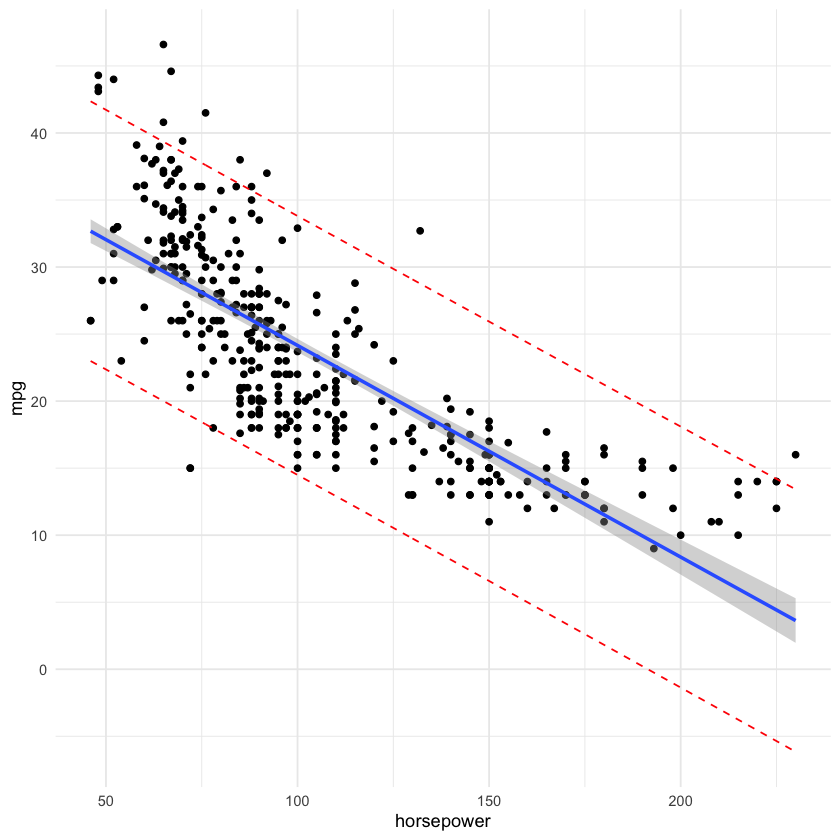

In [75]:
# Add predictions
pred.int <- predict(lm.fit, interval = "prediction")
mydata <- cbind(Auto, pred.int)

g <- ggplot(mydata, aes(horsepower, mpg)) + 
     theme_minimal() +
     geom_point() +
     stat_smooth(method = lm)

# Add prediction intervals
g + geom_line(aes(y = lwr), color = "red", linetype = "dashed") +
    geom_line(aes(y = upr), color = "red", linetype = "dashed")


(c) Use the `plot()` function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

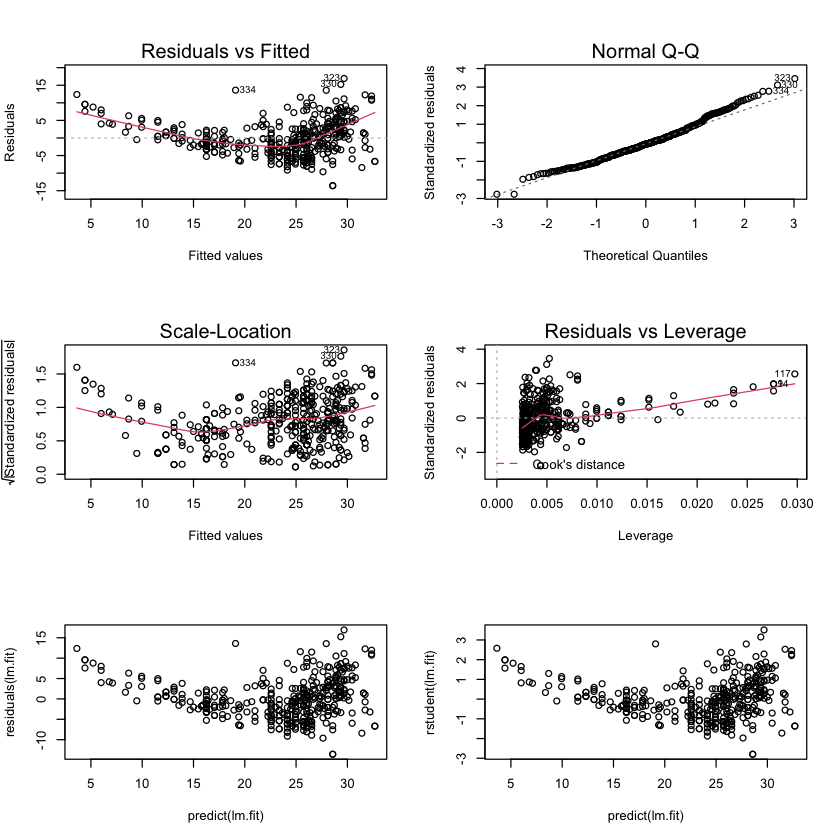

In [68]:
par(mfrow = c(3, 2))
plot(lm.fit)
plot(predict(lm.fit), residuals(lm.fit))
plot(predict(lm.fit), rstudent(lm.fit))

The Residuals Vs Fitted panel shows a clear evidence that the linear assumption does not hold. It seems more a quadratic dependence of the `mpg` on the `horsepower`.

